DATASETS


1. Green growth indicators dataset (csv)
2. Economic Outlook dataset (API)
3. Historical population dataset (csv)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PART ONE

EXPLORING THE FIRST DATASET

GREEN GROWTH:

1. Importing and reviewing the dataset
2. Selecting 3 variables based on most datapoints
3. Reviewing data for selected variables 
4. Reviewing selected variables for one country, Ireland

In [2]:
green_growth = pd.read_csv("GreenGrowth_OECD.csv", index_col = 0)
green_growth.head()

,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
COU,,,,,,,,,,,,,,
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",1990,1990,USD_KG,US dollars per kilogram,0,Units,2015,2015,1.961928,NaN,NaN
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",1995,1995,USD_KG,US dollars per kilogram,0,Units,2015,2015,2.091676,NaN,NaN
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",2000,2000,USD_KG,US dollars per kilogram,0,Units,2015,2015,2.156981,NaN,NaN
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",2010,2010,USD_KG,US dollars per kilogram,0,Units,2015,2015,2.556194,NaN,NaN
AUS,Australia,CO2_PBPROD,"Production-based CO2 productivity, GDP per uni...",2015,2015,USD_KG,US dollars per kilogram,0,Units,2015,2015,3.020283,NaN,NaN


In [3]:
green_growth.describe()

,YEA,Year,PowerCode Code,Value
count,143260.000000,143260.000000,143260.000000,1.432600e+05
mean,2010.670739,2010.670739,0.181223,4.011952e+06
std,9.876944,9.876944,1.026890,1.053445e+09
min,1990.000000,1990.000000,0.000000,-5.059876e+03
25%,2000.000000,2000.000000,0.000000,1.276220e+00
50%,2016.000000,2016.000000,0.000000,1.189200e+01
75%,2018.000000,2018.000000,0.000000,6.515363e+01
max,2021.000000,2021.000000,6.000000,3.217270e+11


In [4]:
green_growth.columns

Index(['Country', 'VAR', 'Variable', 'YEA', 'Year', 'Unit Code', 'Unit',
       'PowerCode Code', 'PowerCode', 'Reference Period Code',
       'Reference Period', 'Value', 'Flag Codes', 'Flags'],
      dtype='object')

In [5]:
green_growth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143260 entries, AUS to MHL
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Country                143260 non-null  object 
 1   VAR                    143260 non-null  object 
 2   Variable               143260 non-null  object 
 3   YEA                    143260 non-null  int64  
 4   Year                   143260 non-null  int64  
 5   Unit Code              129641 non-null  object 
 6   Unit                   129641 non-null  object 
 7   PowerCode Code         143260 non-null  int64  
 8   PowerCode              143260 non-null  object 
 9   Reference Period Code  21206 non-null   object 
 10  Reference Period       21206 non-null   object 
 11  Value                  143260 non-null  float64
 12  Flag Codes             26069 non-null   object 
 13  Flags                  26069 non-null   object 
dtypes: float64(1), int64(3), object(10)
memory

In [6]:
green_growth['Variable']

COU
AUS    Production-based CO2 productivity, GDP per uni...
AUS    Production-based CO2 productivity, GDP per uni...
AUS    Production-based CO2 productivity, GDP per uni...
AUS    Production-based CO2 productivity, GDP per uni...
AUS    Production-based CO2 productivity, GDP per uni...
                             ...                        
MHL                                    Biomass, % of DMC
MHL                                    Biomass, % of DMC
MHL                                    Biomass, % of DMC
MHL                                    Biomass, % of DMC
MHL                                    Biomass, % of DMC
Name: Variable, Length: 143260, dtype: object

In [7]:
green_growth.Variable.value_counts()

Population density, inhabitants per km2                     2437
Population                                                  2300
Annual surface temperature, change since 1951-1980          2243
Nominal exchange rate                                       2236
GDP deflator                                                2170
                                                            ... 
Threatened bird species, % total known species                71
Threatened vascular plant species, % total known species      69
Threatened mammal species, % total known species              67
Total renewable freshwater per capita                         42
Environmentally related R&D expenditure, % GDP                39
Name: Variable, Length: 159, dtype: int64

In [8]:
green_growth.Country.value_counts()

Denmark              1182
Japan                1180
France               1177
Netherlands          1171
Norway               1165
                     ... 
Saint Martin           57
Saint Barthélemy       51
Antarctica             42
Clipperton Island      22
Bonaire                22
Name: Country, Length: 237, dtype: int64

In [9]:
unique_countries = green_growth["Country"].unique()
print(unique_countries)

['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Japan' 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'United Kingdom' 'United States' 'Brazil' 'Chile'
 "China (People's Republic of)" 'Colombia' 'Estonia' 'India' 'Indonesia'
 'Israel' 'Latvia' 'Russia' 'Slovenia' 'South Africa' 'World'
 'BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa'
 'OECD - Total' 'OECD - Europe' 'OECD America' 'OECD Asia Oceania'
 'Saudi Arabia' 'Argentina' 'Costa Rica' 'Lithuania' 'Iran' 'Jordan'
 'Brunei Darussalam' 'Turkmenistan' 'Azerbaijan' "Côte d'Ivoire" 'Algeria'
 'Philippines' 'Viet Nam' 'Egypt' 'Thailand' 'Bolivia'
 'Dominican Republic' 'Panama' 'Peru' 'Lebanon' 'Nicaragua' 'Morocco'
 'Ukraine' 'Haiti' 'Bulgaria' 'Croatia' 'Guatemala' 'Cambodia' 'Paraguay'
 'Iraq' 'Georgia' 'Tunis

In [10]:
unique_variables = green_growth["Variable"].unique()
print(unique_variables)

['Production-based CO2 productivity, GDP per unit of energy-related CO2 emissions'
 'Production-based CO2 intensity, energy-related CO2 per capita'
 'Energy productivity,  GDP per unit of TPES'
 'Energy intensity, TPES per capita'
 'Renewable energy supply, % total energy supply'
 'Renewable electricity, % total electricity generation'
 'Total freshwater abstraction per capita'
 'Water stress, total freshwater abstraction as % total available renewable resources'
 'Water stress, total freshwater abstraction as % total internal renewable resources'
 'Threatened mammal species, % total known species'
 'Threatened bird species, % total known species'
 'Threatened vascular plant species, % total known species'
 'Population connected to public sewerage, % total population'
 'Environmentally related government R&D budget, % total government R&D'
 'Environmentally related R&D expenditure, % GDP'
 'Renewable energy public RD&D budget, % total energy public RD&D'
 'Energy public RD&D budget, % 

In [11]:
grouped_variables=green_growth.groupby(['Country','Variable']).count()['Value'].sort_values(ascending=False)
print(grouped_variables)

Country     Variable                                                                        
Bhutan      Real GDP, Index 2000=100                                                            11
Spain       Terrestrial protected area, % land area                                             11
Costa Rica  Marine protected area, % total exclusive economic zone                              11
Tanzania    Annual surface temperature, change since 1951-1980                                  11
Belgium     Marine protected area, % total exclusive economic zone                              11
                                                                                                ..
Cyprus      Petrol tax, USD per litre                                                            1
            Seasonal surface water, % total surface                                              1
Mali        Conversion of seasonal to permanent water surface, % permanent water, since 1984     1
Turkey      Conv

In [12]:
green_growth_significant=green_growth.groupby(['Country','Variable']).filter(lambda v: (v.Value.size >= 11))

In [13]:
green_growth_significant.head()

,Country,VAR,Variable,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
COU,,,,,,,,,,,,,,
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",1990,1990,PC,Percentage,0,Units,NaN,NaN,3.115022,B,Break
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",1995,1995,PC,Percentage,0,Units,NaN,NaN,1.194272,B,Break
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",2000,2000,PC,Percentage,0,Units,NaN,NaN,2.950042,B,Break
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",2010,2010,PC,Percentage,0,Units,NaN,NaN,3.953611,B,Break
AUS,Australia,ENVRD_GBAORD,"Environmentally related government R&D budget,...",2015,2015,PC,Percentage,0,Units,NaN,NaN,3.828087,B,Break


In [14]:
unique_variables_significant = green_growth_significant["Variable"].unique()
print(unique_variables_significant)

['Environmentally related government R&D budget, % total government R&D'
 'Real GDP per capita' 'Population density, inhabitants per km2'
 'Renewable energy public RD&D budget, % total energy public RD&D'
 'Energy public RD&D budget, % GDP'
 'Value added in services, % of total value added'
 'Real GDP, Index 2000=100' 'Diesel tax, USD per litre'
 'Petrol tax, USD per litre'
 'Value added in industry, % of total value added'
 'Value added in agriculture, % of total value added'
 'Fossil fuel public RD&D budget (excluding CCS), % total energy public RD&D'
 'Diesel end-user price, USD per litre'
 'Petrol end-user price, USD per litre'
 'Industry electricity price, USD per kWh'
 'Residential electricity price, USD per kWh'
 'Annual surface temperature, change since 1951-1980'
 'Terrestrial protected area, % land area'
 'Marine protected area, % total exclusive economic zone'
 'Farmland Birds Index, 2000=100' 'Irrigated land, % agricultural land'
 'GDP deflator' 'Nominal exchange rate' 'Pur

In [15]:
main_variables=green_growth_significant.groupby(['Variable']).count()['Value'].sort_values(ascending=False)
print(main_variables)

Variable
Population density, inhabitants per km2                                       2013
GDP deflator                                                                  1936
Nominal exchange rate                                                         1914
Purchasing power parity                                                       1837
Annual surface temperature, change since 1951-1980                            1815
Terrestrial protected area, % land area                                       1221
Marine protected area, % total exclusive economic zone                        1045
Real GDP, Index 2000=100                                                       990
Real GDP per capita                                                            990
Real GDP                                                                       990
Value added in industry, % of total value added                                264
Value added in agriculture, % of total value added                            

1. Picking 2 variables on area:
- Terrestrial protected area, % land area                                       1221
- Marine protected area, % total exclusive economic zone                        1045                                           

2. Also 1 variable on population density:
- Population density, inhabitants per km2                                       2013

In [16]:
green_growth_significant_ind = green_growth_significant.set_index("Variable")
print(green_growth_significant_ind.head())

                                                      Country           VAR  \
Variable                                                                      
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   
Environmentally related government R&D budget, ...  Australia  ENVRD_GBAORD   

                                                     YEA  Year Unit Code  \
Variable                                                                   
Environmentally related government R&D budget, ...  1990  1990        PC   
Environmentally related government R&D budget, ...  1995  1995        PC   
Environmentally related government R&D budget, ...  2000  2000        PC   
Environmentally related government R&D budget, ...  2010  2010    

In [17]:
green_growth_significant_ind.loc[["Terrestrial protected area, % land area","Marine protected area, % total exclusive economic zone","Population density, inhabitants per km2"]].sort_index()


,Country,VAR,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Variable,,,,,,,,,,,,,
"Marine protected area, % total exclusive economic zone",Russia,PA_MARINE,2016,2016,PC,Percentage,0,Units,NaN,NaN,1.377622,NaN,NaN
"Marine protected area, % total exclusive economic zone",Italy,PA_MARINE,2015,2015,PC,Percentage,0,Units,NaN,NaN,5.495167,NaN,NaN
"Marine protected area, % total exclusive economic zone",Italy,PA_MARINE,2010,2010,PC,Percentage,0,Units,NaN,NaN,5.481958,NaN,NaN
"Marine protected area, % total exclusive economic zone",Italy,PA_MARINE,2000,2000,PC,Percentage,0,Units,NaN,NaN,4.437385,NaN,NaN
"Marine protected area, % total exclusive economic zone",Italy,PA_MARINE,1995,1995,PC,Percentage,0,Units,NaN,NaN,0.555124,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Terrestrial protected area, % land area",Tajikistan,PA_TERRESTRIAL,2010,2010,PC,Percentage,0,Units,NaN,NaN,19.138541,NaN,NaN
"Terrestrial protected area, % land area",Tajikistan,PA_TERRESTRIAL,2015,2015,PC,Percentage,0,Units,NaN,NaN,22.139757,NaN,NaN
"Terrestrial protected area, % land area",Tajikistan,PA_TERRESTRIAL,2016,2016,PC,Percentage,0,Units,NaN,NaN,22.143870,NaN,NaN


In [18]:
green = green_growth_significant_ind.loc[["Terrestrial protected area, % land area","Marine protected area, % total exclusive economic zone","Population density, inhabitants per km2"]]
print(green)

                                          Country             VAR   YEA  Year  \
Variable                                                                        
Terrestrial protected area, % land area  Bulgaria  PA_TERRESTRIAL  1990  1990   
Terrestrial protected area, % land area  Bulgaria  PA_TERRESTRIAL  1995  1995   
Terrestrial protected area, % land area  Bulgaria  PA_TERRESTRIAL  2000  2000   
Terrestrial protected area, % land area  Bulgaria  PA_TERRESTRIAL  2010  2010   
Terrestrial protected area, % land area  Bulgaria  PA_TERRESTRIAL  2015  2015   
...                                           ...             ...   ...   ...   
Population density, inhabitants per km2    Monaco          POPDEN  2017  2017   
Population density, inhabitants per km2    Monaco          POPDEN  2018  2018   
Population density, inhabitants per km2    Monaco          POPDEN  2019  2019   
Population density, inhabitants per km2    Monaco          POPDEN  2020  2020   
Population density, inhabita

In [19]:
non_individual_countries = ['World','BRIICS economies - Brazil, Russia, India, Indonesia, China and South Africa','OECD - Total','OECD - Europe','OECD America','OECD Asia Oceania','G20','G7','Eastern Europe, Caucasus and Central Asia','Latin America and Caribbean','Middle East and North Africa','European Union (28 countries)','Euro area (19 countries)','ASEAN','European Union – 27 countries (from 01/02/2020)']

In [20]:
green = green[green.Country.isin(non_individual_countries) == False]
print(green["Country"].unique())

['Bulgaria' 'Saudi Arabia' 'Australia' 'Martinique' 'Clipperton Island'
 'Azerbaijan' 'Japan' 'Uzbekistan' 'Kyrgyzstan' 'Lithuania' 'Spain'
 'Northern Mariana Islands' 'Montserrat' 'Jersey' 'France' 'Turkmenistan'
 'Switzerland' 'Israel' 'Anguilla' 'South Africa' 'Greece' 'Bonaire'
 'Moldova' 'Kazakhstan' 'Puerto Rico' 'Indonesia' 'Wallis and Futuna'
 'Saint Pierre and Miquelon' 'Luxembourg' 'Croatia' 'Latvia' 'Cyprus'
 'Peru' 'New Caledonia' "China (People's Republic of)" 'Christmas Islands'
 'Bermuda' 'Slovak Republic' 'American Samoa' 'Finland' 'Saint Helena'
 'Sweden' 'Armenia' 'Ireland' 'Belarus' 'Malta' 'Faeroe Islands' 'Denmark'
 'New Zealand' 'Poland' 'Brazil' 'United Kingdom' 'Russia' 'Belgium'
 'Costa Rica' 'Czech Republic' 'Argentina' 'Iceland' 'Netherlands' 'Aruba'
 'Slovenia' 'Austria' 'Korea' 'Curacao' 'Sint Maarten' 'Tajikistan'
 'Saint Martin' 'Mexico' 'Saint Barthélemy' 'Turks and Caicos Islands'
 'Chile' 'Germany' 'Colombia' 'India' 'Cayman Islands' 'Ukraine'
 'United

In [21]:
green.sort_values([ "Country", "Value"], ascending =[False, False ])

,Country,VAR,YEA,Year,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Variable,,,,,,,,,,,,,
"Population density, inhabitants per km2",Zimbabwe,POPDEN,2021,2021,HAB,Inhabitants,0,Units,NaN,NaN,38.62261,E,Estimated value
"Population density, inhabitants per km2",Zimbabwe,POPDEN,2020,2020,HAB,Inhabitants,0,Units,NaN,NaN,38.03595,E,Estimated value
"Population density, inhabitants per km2",Zimbabwe,POPDEN,2019,2019,HAB,Inhabitants,0,Units,NaN,NaN,37.47946,E,Estimated value
"Population density, inhabitants per km2",Zimbabwe,POPDEN,2018,2018,HAB,Inhabitants,0,Units,NaN,NaN,36.95059,E,Estimated value
"Population density, inhabitants per km2",Zimbabwe,POPDEN,2017,2017,HAB,Inhabitants,0,Units,NaN,NaN,36.43310,E,Estimated value
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Population density, inhabitants per km2",Afghanistan,POPDEN,2015,2015,HAB,Inhabitants,0,Units,NaN,NaN,52.71207,E,Estimated value
"Population density, inhabitants per km2",Afghanistan,POPDEN,2010,2010,HAB,Inhabitants,0,Units,NaN,NaN,44.70409,E,Estimated value
"Population density, inhabitants per km2",Afghanistan,POPDEN,2000,2000,HAB,Inhabitants,0,Units,NaN,NaN,31.82912,E,Estimated value


In [22]:
green_country = green.set_index("Country")
print(green_country.head())

                     VAR   YEA  Year Unit Code        Unit  PowerCode Code  \
Country                                                                      
Bulgaria  PA_TERRESTRIAL  1990  1990        PC  Percentage               0   
Bulgaria  PA_TERRESTRIAL  1995  1995        PC  Percentage               0   
Bulgaria  PA_TERRESTRIAL  2000  2000        PC  Percentage               0   
Bulgaria  PA_TERRESTRIAL  2010  2010        PC  Percentage               0   
Bulgaria  PA_TERRESTRIAL  2015  2015        PC  Percentage               0   

         PowerCode Reference Period Code Reference Period      Value  \
Country                                                                
Bulgaria     Units                   NaN              NaN   2.343140   
Bulgaria     Units                   NaN              NaN   4.654114   
Bulgaria     Units                   NaN              NaN   4.866177   
Bulgaria     Units                   NaN              NaN  40.671747   
Bulgaria     Units   

In [23]:
green_country_ireland = green_country.loc[["Ireland"]]
print(green_country_ireland.head())

                    VAR   YEA  Year Unit Code        Unit  PowerCode Code  \
Country                                                                     
Ireland  PA_TERRESTRIAL  1990  1990        PC  Percentage               0   
Ireland  PA_TERRESTRIAL  1995  1995        PC  Percentage               0   
Ireland  PA_TERRESTRIAL  2000  2000        PC  Percentage               0   
Ireland  PA_TERRESTRIAL  2010  2010        PC  Percentage               0   
Ireland  PA_TERRESTRIAL  2015  2015        PC  Percentage               0   

        PowerCode Reference Period Code Reference Period      Value  \
Country                                                               
Ireland     Units                   NaN              NaN   9.830447   
Ireland     Units                   NaN              NaN  10.327606   
Ireland     Units                   NaN              NaN  10.534716   
Ireland     Units                   NaN              NaN  13.660140   
Ireland     Units                 

Text(0.5, 1.0, 'Green Growth in Ireland')

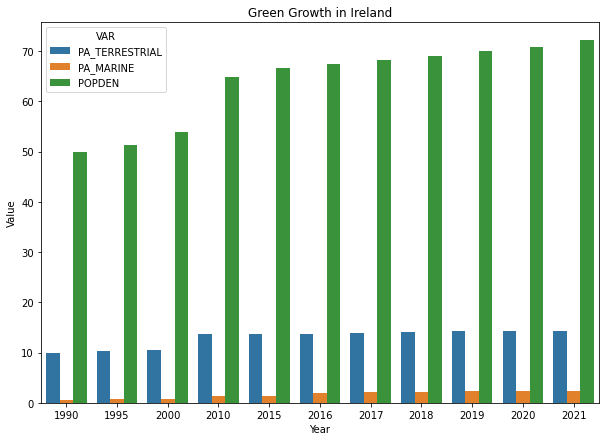

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=green_country_ireland, y='Value', x='Year', hue='VAR')
plt.title('Green Growth in Ireland')

Text(0.5, 1.0, 'Global Green Growth')

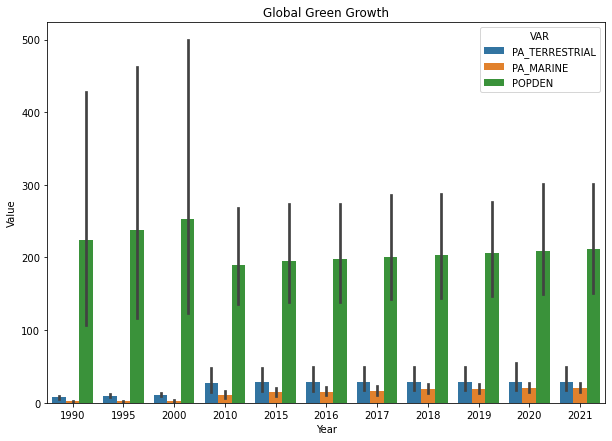

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
sns.barplot(data=green, y='Value', x='Year', hue='VAR')
plt.title('Global Green Growth')

EXPLORING THE SECOND DATASET

ECONOMIC OUTLOOK

1. Getting the dataset via API
2. Converting it to a DataFrame
3. Reviewing the data

In [26]:
def get_from_oecd(sdmx_query):
    return pd.read_csv(
        f"https://stats.oecd.org/SDMX-JSON/data/{sdmx_query}?contentType=csv&startTime=2003&endTime=2023&pid=9b237e1c-7f76-41b7-b7bc-5fa6fbe125df"
    )

economic_outlook =get_from_oecd('EO110_INTERNET/AUS+AUT+BEL+CAN+CHL+COL+CRI+CZE+DNK+EST+FIN+FRA+DEU+GRC+HUN+ISL+IRL+ISR+ITA+JPN+KOR+LVA+LTU+LUX+MEX+NLD+NZL+NOR+POL+PRT+SVK+SVN+ESP+SWE+CHE+TUR+GBR+USA+EA17+NAT+OTO+WLD+NMEC+ARG+BRA+BGR+CHN+IND+IDN+ROU+RUS+ZAF+GRPS+OPEC+PAC+EUR+SOV+DAE+ROW+RWD+OOP+OIL.GDPV_ANNPCT.A/all')

print(economic_outlook.head())

  LOCATION    Country     VARIABLE                                Variable  \
0      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   
1      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   
2      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   
3      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   
4      AUS  Australia  GDPV_ANNPCT  Gross domestic product, volume, growth   

  FREQUENCY Frequency  TIME  Time Unit Code        Unit  PowerCode Code  \
0         A    Annual  2003  2003        PC  Percentage               0   
1         A    Annual  2004  2004        PC  Percentage               0   
2         A    Annual  2005  2005        PC  Percentage               0   
3         A    Annual  2006  2006        PC  Percentage               0   
4         A    Annual  2007  2007        PC  Percentage               0   

  PowerCode Reference Period Code Reference Period     Value  Flag Codes  \
0   

In [27]:
economic_outlook.columns

Index(['LOCATION', 'Country', 'VARIABLE', 'Variable', 'FREQUENCY', 'Frequency',
       'TIME', 'Time', 'Unit Code', 'Unit', 'PowerCode Code', 'PowerCode',
       'Reference Period Code', 'Reference Period', 'Value', 'Flag Codes',
       'Flags'],
      dtype='object')

In [28]:
economic_outlook.describe()

,TIME,Time,PowerCode Code,Value,Flag Codes,Flags
count,1134.000000,1134.000000,1134.0,1134.000000,0.0,0.0
mean,2013.000000,2013.000000,0.0,2.782269,NaN,NaN
std,6.057972,6.057972,0.0,3.525247,NaN,NaN
min,2003.000000,2003.000000,0.0,-14.838611,NaN,NaN
25%,2008.000000,2008.000000,0.0,1.460152,NaN,NaN
50%,2013.000000,2013.000000,0.0,2.903394,NaN,NaN
75%,2018.000000,2018.000000,0.0,4.668135,NaN,NaN
max,2023.000000,2023.000000,0.0,25.358044,NaN,NaN


In [29]:
economic_outlook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LOCATION               1134 non-null   object 
 1   Country                1134 non-null   object 
 2   VARIABLE               1134 non-null   object 
 3   Variable               1134 non-null   object 
 4   FREQUENCY              1134 non-null   object 
 5   Frequency              1134 non-null   object 
 6   TIME                   1134 non-null   int64  
 7   Time                   1134 non-null   int64  
 8   Unit Code              1134 non-null   object 
 9   Unit                   1134 non-null   object 
 10  PowerCode Code         1134 non-null   int64  
 11  PowerCode              1134 non-null   object 
 12  Reference Period Code  1134 non-null   object 
 13  Reference Period       1134 non-null   object 
 14  Value                  1134 non-null   float64
 15  Flag

In [30]:
economic_outlook_variable = economic_outlook["Variable"].unique()
print(economic_outlook_variable)

['Gross domestic product, volume, growth']


In [31]:
economic_outlook_variable_1 = economic_outlook["Country"].unique()
print(economic_outlook_variable_1)

['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Japan' 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'United Kingdom' 'United States' 'OECD - Total' 'Brazil' 'Chile'
 "China (People's Republic of)" 'Colombia' 'Costa Rica' 'Estonia' 'India'
 'Indonesia' 'Israel' 'Latvia' 'Russia' 'South Africa' 'World'
 'Dynamic Asian Economies' 'Other oil producers' 'Slovenia' 'Norway'
 'Argentina' 'Non-OECD Economies' 'Euro area (17 countries)' 'Bulgaria'
 'Rest of the World' 'Romania' 'Lithuania']


In [32]:
non_individual_countries_economics=['Non-OECD Economies','OECD - Total','Other oil producers','Rest of the World','Dynamic Asian Economies','Euro area (17 countries)','World']

In [33]:
e_variables= economic_outlook.groupby(['Country']).count()['Variable'].sort_values(ascending=False)
print(e_variables)

Country
Argentina                       21
Portugal                        21
Latvia                          21
Lithuania                       21
Luxembourg                      21
Mexico                          21
Netherlands                     21
New Zealand                     21
Non-OECD Economies              21
Norway                          21
OECD - Total                    21
Other oil producers             21
Poland                          21
Rest of the World               21
Australia                       21
Romania                         21
Russia                          21
Slovak Republic                 21
Slovenia                        21
South Africa                    21
Spain                           21
Sweden                          21
Switzerland                     21
Turkey                          21
United Kingdom                  21
United States                   21
Korea                           21
Japan                           21
Italy       

In [34]:
economic_outlook = economic_outlook[economic_outlook.Country.isin(non_individual_countries_economics) == False]
print(economic_outlook["Country"].unique())
economic_countries = economic_outlook.set_index("Country")
print(economic_countries.head())

['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Japan' 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'United Kingdom' 'United States' 'Brazil' 'Chile'
 "China (People's Republic of)" 'Colombia' 'Costa Rica' 'Estonia' 'India'
 'Indonesia' 'Israel' 'Latvia' 'Russia' 'South Africa' 'Slovenia' 'Norway'
 'Argentina' 'Bulgaria' 'Romania' 'Lithuania']
          LOCATION     VARIABLE                                Variable  \
Country                                                                   
Australia      AUS  GDPV_ANNPCT  Gross domestic product, volume, growth   
Australia      AUS  GDPV_ANNPCT  Gross domestic product, volume, growth   
Australia      AUS  GDPV_ANNPCT  Gross domestic product, volume, growth   
Australia      AUS  GDPV_ANNPCT  Gross domestic product, volume, growth   
Australia  

In [35]:
economic_countries_variable= economic_countries["Unit"].unique()
print(economic_countries_variable)

['Percentage']


In [36]:
economic_ireland = economic_countries.loc["Ireland"]
print(economic_ireland.head())

        LOCATION     VARIABLE                                Variable  \
Country                                                                 
Ireland      IRL  GDPV_ANNPCT  Gross domestic product, volume, growth   
Ireland      IRL  GDPV_ANNPCT  Gross domestic product, volume, growth   
Ireland      IRL  GDPV_ANNPCT  Gross domestic product, volume, growth   
Ireland      IRL  GDPV_ANNPCT  Gross domestic product, volume, growth   
Ireland      IRL  GDPV_ANNPCT  Gross domestic product, volume, growth   

        FREQUENCY Frequency  TIME  Time Unit Code        Unit  PowerCode Code  \
Country                                                                         
Ireland         A    Annual  2003  2003        PC  Percentage               0   
Ireland         A    Annual  2004  2004        PC  Percentage               0   
Ireland         A    Annual  2005  2005        PC  Percentage               0   
Ireland         A    Annual  2006  2006        PC  Percentage               0   
Ir

In [37]:
economic_countries.head()

,LOCATION,VARIABLE,Variable,FREQUENCY,Frequency,TIME,Time,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
Country,,,,,,,,,,,,,,,,
Australia,AUS,GDPV_ANNPCT,"Gross domestic product, volume, growth",A,Annual,2003,2003,PC,Percentage,0,Units,2018_19,2018-19,2.921406,NaN,NaN
Australia,AUS,GDPV_ANNPCT,"Gross domestic product, volume, growth",A,Annual,2004,2004,PC,Percentage,0,Units,2018_19,2018-19,3.970002,NaN,NaN
Australia,AUS,GDPV_ANNPCT,"Gross domestic product, volume, growth",A,Annual,2005,2005,PC,Percentage,0,Units,2018_19,2018-19,3.060089,NaN,NaN
Australia,AUS,GDPV_ANNPCT,"Gross domestic product, volume, growth",A,Annual,2006,2006,PC,Percentage,0,Units,2018_19,2018-19,2.756867,NaN,NaN
Australia,AUS,GDPV_ANNPCT,"Gross domestic product, volume, growth",A,Annual,2007,2007,PC,Percentage,0,Units,2018_19,2018-19,4.429282,NaN,NaN


Text(0.5, 1.0, 'GDP in Ireland')

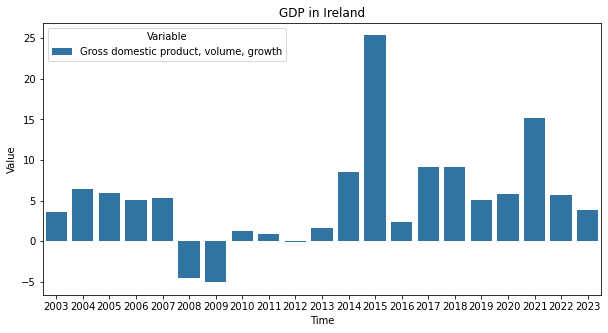

In [38]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=economic_ireland, y='Value', x='Time', hue='Variable')
plt.title('GDP in Ireland')

Text(0.5, 1.0, 'Global GDP')

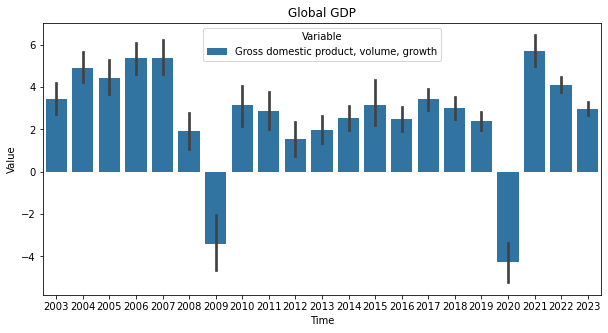

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=economic_countries, y='Value', x='Time', hue='Variable')
plt.title('Global GDP')

EXPLORING THE THIRD DATASET

HISTORICAL POPULATION:

1. Importing data
2. Converting it to a DataFrame
3. Reviewing data

In [40]:
historical_pop = pd.read_csv("HISTPOP_OECD.csv", index_col = 0)
historical_pop.head()

,Country,SEX,Sex,AGE,Age,TIME,Time,Value,Flag Codes,Flags
LOCATION,,,,,,,,,,
AUS,Australia,W,Women,TOTAL,Total,2005,2005,10157211.0,NaN,NaN
AUS,Australia,W,Women,TOTAL,Total,2006,2006,10291542.0,NaN,NaN
AUS,Australia,W,Women,TOTAL,Total,2007,2007,10473986.0,NaN,NaN
AUS,Australia,W,Women,TOTAL,Total,2008,2008,10677154.0,NaN,NaN
AUS,Australia,W,Women,TOTAL,Total,2009,2009,10890856.0,NaN,NaN


In [41]:
historical_pop.describe()

,TIME,Time,Value,Flag Codes,Flags
count,81840.0000,81840.0000,8.184000e+04,0.0,0.0
mean,2012.5000,2012.5000,2.725835e+07,NaN,NaN
std,4.6098,4.6098,2.138482e+08,NaN,NaN
min,2005.0000,2005.0000,-2.334194e+00,NaN,NaN
25%,2008.7500,2008.7500,1.657375e+04,NaN,NaN
50%,2012.5000,2012.5000,3.523030e+05,NaN,NaN
75%,2016.2500,2016.2500,2.665769e+06,NaN,NaN
max,2020.0000,2020.0000,7.794799e+09,NaN,NaN


In [42]:
historical_pop.columns

Index(['Country', 'SEX', 'Sex', 'AGE', 'Age', 'TIME', 'Time', 'Value',
       'Flag Codes', 'Flags'],
      dtype='object')

In [43]:
historical_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81840 entries, AUS to SVN
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     81840 non-null  object 
 1   SEX         81840 non-null  object 
 2   Sex         81840 non-null  object 
 3   AGE         81840 non-null  object 
 4   Age         81840 non-null  object 
 5   TIME        81840 non-null  int64  
 6   Time        81840 non-null  int64  
 7   Value       81840 non-null  float64
 8   Flag Codes  0 non-null      float64
 9   Flags       0 non-null      float64
dtypes: float64(3), int64(2), object(5)
memory usage: 6.9+ MB


In [44]:
historical_pop_countries = historical_pop["Country"].unique()
print(historical_pop_countries)

['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Japan' 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'United Kingdom' 'United States' 'Argentina'
 'Brazil' 'Bulgaria' 'Chile' "China (People's Republic of)" 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Estonia' 'India' 'Indonesia' 'Israel'
 'Latvia' 'Lithuania' 'Malta' 'Romania' 'Russia' 'Saudi Arabia'
 'Singapore' 'Slovenia' 'South Africa' 'World' 'G20' 'OECD - Total']


In [45]:
non_individual_countries_historical=['World','G20','OECD - Total']

In [46]:
historical_pop = historical_pop[historical_pop.Country.isin(non_individual_countries_historical) == False]
print(historical_pop["Country"].unique())

['Australia' 'Austria' 'Belgium' 'Canada' 'Czech Republic' 'Denmark'
 'Finland' 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland'
 'Italy' 'Japan' 'Korea' 'Luxembourg' 'Mexico' 'Netherlands' 'New Zealand'
 'Norway' 'Poland' 'Portugal' 'Slovak Republic' 'Spain' 'Sweden'
 'Switzerland' 'Turkey' 'United Kingdom' 'United States' 'Argentina'
 'Brazil' 'Bulgaria' 'Chile' "China (People's Republic of)" 'Colombia'
 'Costa Rica' 'Croatia' 'Cyprus' 'Estonia' 'India' 'Indonesia' 'Israel'
 'Latvia' 'Lithuania' 'Malta' 'Romania' 'Russia' 'Saudi Arabia'
 'Singapore' 'Slovenia' 'South Africa']


In [47]:
historical_pop_countries_ind = historical_pop.set_index("Country")
print(historical_pop_countries_ind.head())

          SEX    Sex    AGE    Age  TIME  Time       Value  Flag Codes  Flags
Country                                                                      
Australia   W  Women  TOTAL  Total  2005  2005  10157211.0         NaN    NaN
Australia   W  Women  TOTAL  Total  2006  2006  10291542.0         NaN    NaN
Australia   W  Women  TOTAL  Total  2007  2007  10473986.0         NaN    NaN
Australia   W  Women  TOTAL  Total  2008  2008  10677154.0         NaN    NaN
Australia   W  Women  TOTAL  Total  2009  2009  10890856.0         NaN    NaN


In [48]:
historical_pop_ireland = historical_pop.set_index("Country").loc["Ireland"]
print(historical_pop_ireland.head())

        SEX    Sex    AGE    Age  TIME  Time      Value  Flag Codes  Flags
Country                                                                   
Ireland   W  Women  TOTAL  Total  2005  2005  2072008.0         NaN    NaN
Ireland   W  Women  TOTAL  Total  2006  2006  2115607.0         NaN    NaN
Ireland   W  Women  TOTAL  Total  2007  2007  2184567.0         NaN    NaN
Ireland   W  Women  TOTAL  Total  2008  2008  2246489.0         NaN    NaN
Ireland   W  Women  TOTAL  Total  2009  2009  2276053.0         NaN    NaN


Text(0.5, 1.0, 'Global Population')

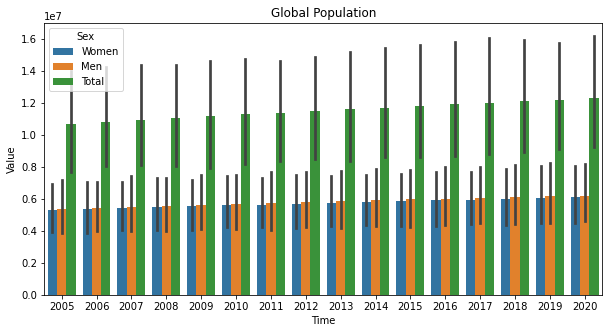

In [49]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=historical_pop_countries_ind, y='Value', x='Time', hue='Sex')
plt.title('Global Population')

Text(0.5, 1.0, 'Population in Ireland')

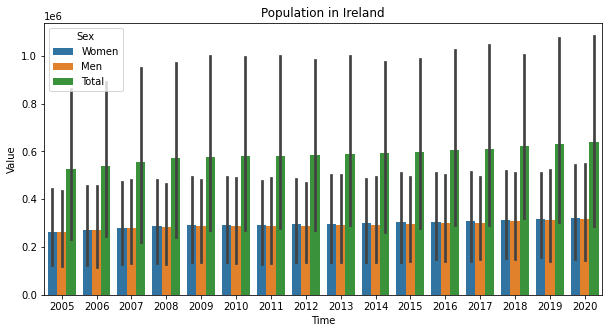

In [50]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(data=historical_pop_ireland, y='Value', x='Time', hue='Sex')
plt.title('Population in Ireland')

PART TWO

Checking missing values, dropping & renaming columns in the datasets.

In [51]:
missing_values_historical_pop = historical_pop_countries_ind.isnull().sum()
print(missing_values_historical_pop[:])

SEX               0
Sex               0
AGE               0
Age               0
TIME              0
Time              0
Value             0
Flag Codes    77376
Flags         77376
dtype: int64


In [52]:
dropcolumns_historical_pop= historical_pop_countries_ind.drop(['Flag Codes','Flags', 'SEX','Sex','AGE','Time','Age'],axis=1)
print(dropcolumns_historical_pop.shape,historical_pop_countries_ind.shape)

(77376, 2) (77376, 9)


In [53]:
dropcolumns_historical_pop.head()

,TIME,Value
Country,,
Australia,2005,10157211.0
Australia,2006,10291542.0
Australia,2007,10473986.0
Australia,2008,10677154.0
Australia,2009,10890856.0


In [54]:
dropcolumns_historical_pop.insert(2,"Variable","Historical population")
print(dropcolumns_historical_pop)

           TIME         Value               Variable
Country                                             
Australia  2005  1.015721e+07  Historical population
Australia  2006  1.029154e+07  Historical population
Australia  2007  1.047399e+07  Historical population
Australia  2008  1.067715e+07  Historical population
Australia  2009  1.089086e+07  Historical population
...         ...           ...                    ...
Slovenia   2016  1.288929e-01  Historical population
Slovenia   2017  2.052014e-01  Historical population
Slovenia   2018  4.153131e-01  Historical population
Slovenia   2019  1.514316e+00  Historical population
Slovenia   2020  8.268991e-01  Historical population

[77376 rows x 3 columns]


In [55]:
historical=dropcolumns_historical_pop.rename(columns = {'TIME' : 'Year', 'Value' : 'Value'})
print(historical.head())

           Year       Value               Variable
Country                                           
Australia  2005  10157211.0  Historical population
Australia  2006  10291542.0  Historical population
Australia  2007  10473986.0  Historical population
Australia  2008  10677154.0  Historical population
Australia  2009  10890856.0  Historical population


In [56]:
historical_Ireland = dropcolumns_historical_pop.filter(like='Ireland', axis=0)
print(historical_Ireland.head())

         TIME      Value               Variable
Country                                        
Ireland  2005  2072008.0  Historical population
Ireland  2006  2115607.0  Historical population
Ireland  2007  2184567.0  Historical population
Ireland  2008  2246489.0  Historical population
Ireland  2009  2276053.0  Historical population


In [57]:
missing_values_economic_outlook = economic_countries.isnull().sum()
print(missing_values_economic_outlook[:])

LOCATION                   0
VARIABLE                   0
Variable                   0
FREQUENCY                  0
Frequency                  0
TIME                       0
Time                       0
Unit Code                  0
Unit                       0
PowerCode Code             0
PowerCode                  0
Reference Period Code      0
Reference Period           0
Value                      0
Flag Codes               987
Flags                    987
dtype: int64


In [58]:
dropcolumns_economic= economic_countries.drop(['Flag Codes','Flags','FREQUENCY','Frequency','VARIABLE','Time', 'Unit Code', 'Unit','PowerCode Code','PowerCode','Reference Period Code','LOCATION','Reference Period'],axis=1)
print(dropcolumns_economic.shape,economic_countries.shape)

(987, 3) (987, 16)


In [59]:
dropcolumns_economic.head()

,Variable,TIME,Value
Country,,,
Australia,"Gross domestic product, volume, growth",2003,2.921406
Australia,"Gross domestic product, volume, growth",2004,3.970002
Australia,"Gross domestic product, volume, growth",2005,3.060089
Australia,"Gross domestic product, volume, growth",2006,2.756867
Australia,"Gross domestic product, volume, growth",2007,4.429282


In [60]:
economic=dropcolumns_economic.rename(columns = {'TIME' : 'Year', 'Variable' : 'Variable', 'Value' : 'Value'})
print(economic.head())

                                         Variable  Year     Value
Country                                                          
Australia  Gross domestic product, volume, growth  2003  2.921406
Australia  Gross domestic product, volume, growth  2004  3.970002
Australia  Gross domestic product, volume, growth  2005  3.060089
Australia  Gross domestic product, volume, growth  2006  2.756867
Australia  Gross domestic product, volume, growth  2007  4.429282


In [61]:
economic_Ireland = dropcolumns_economic.filter(like='Ireland', axis=0)
print(economic_Ireland)

                                       Variable  TIME      Value
Country                                                         
Ireland  Gross domestic product, volume, growth  2003   3.555808
Ireland  Gross domestic product, volume, growth  2004   6.404289
Ireland  Gross domestic product, volume, growth  2005   5.877199
Ireland  Gross domestic product, volume, growth  2006   5.061423
Ireland  Gross domestic product, volume, growth  2007   5.309162
Ireland  Gross domestic product, volume, growth  2008  -4.574706
Ireland  Gross domestic product, volume, growth  2009  -5.081486
Ireland  Gross domestic product, volume, growth  2010   1.294209
Ireland  Gross domestic product, volume, growth  2011   0.907993
Ireland  Gross domestic product, volume, growth  2012  -0.145821
Ireland  Gross domestic product, volume, growth  2013   1.585249
Ireland  Gross domestic product, volume, growth  2014   8.477340
Ireland  Gross domestic product, volume, growth  2015  25.358044
Ireland  Gross domestic p

In [62]:
missing_values_green_country = green_country.isnull().sum()
print(missing_values_green_country[:])

VAR                         0
YEA                         0
Year                        0
Unit Code                   0
Unit                        0
PowerCode Code              0
PowerCode                   0
Reference Period Code    3872
Reference Period         3872
Value                       0
Flag Codes               2305
Flags                    2305
dtype: int64


In [63]:
dropcolumns_green= green_country.drop(['Flag Codes','Flags','Reference Period Code','Reference Period','PowerCode Code','PowerCode','Unit Code','YEA', 'Unit'],axis=1)
print(dropcolumns_green.shape,green.shape)

(3872, 3) (3872, 13)


In [64]:
dropcolumns_green.head()

,VAR,Year,Value
Country,,,
Bulgaria,PA_TERRESTRIAL,1990,2.343140
Bulgaria,PA_TERRESTRIAL,1995,4.654114
Bulgaria,PA_TERRESTRIAL,2000,4.866177
Bulgaria,PA_TERRESTRIAL,2010,40.671747
Bulgaria,PA_TERRESTRIAL,2015,40.870565


In [65]:
dropcolumns_green_final=dropcolumns_green.rename(columns = {'VAR' : 'Variable', 'Value' : 'Value'})
print(dropcolumns_green_final.head())

                Variable  Year      Value
Country                                  
Bulgaria  PA_TERRESTRIAL  1990   2.343140
Bulgaria  PA_TERRESTRIAL  1995   4.654114
Bulgaria  PA_TERRESTRIAL  2000   4.866177
Bulgaria  PA_TERRESTRIAL  2010  40.671747
Bulgaria  PA_TERRESTRIAL  2015  40.870565


In [66]:
dropcolumns_green_final_variable = dropcolumns_green["VAR"].unique()
print(dropcolumns_green_final_variable)

['PA_TERRESTRIAL' 'PA_MARINE' 'POPDEN']


In [67]:
dropcolumns_green_final.shape

(3872, 3)

PART THREE

CREATING THE FINAL DATASET

First I tried MERGING my 3 datasets.

In [68]:
new_df = pd.merge(economic,dropcolumns_green_final, left_on=['Country','Year'], right_on=['Country', 'Year'], how='inner')
print(new_df.shape)

(984, 5)


In [69]:
new_df.head()

,Variable_x,Year,Value_x,Variable_y,Value_y
Country,,,,,
Australia,"Gross domestic product, volume, growth",2010,2.448044,PA_TERRESTRIAL,11.461127
Australia,"Gross domestic product, volume, growth",2010,2.448044,PA_MARINE,6.002622
Australia,"Gross domestic product, volume, growth",2010,2.448044,POPDEN,2.846031
Australia,"Gross domestic product, volume, growth",2015,2.297318,PA_TERRESTRIAL,18.277165
Australia,"Gross domestic product, volume, growth",2015,2.297318,PA_MARINE,11.252445


In [70]:
final_df = pd.merge(new_df, historical, left_on=['Country','Year'], right_on=['Country', 'Year'], how='inner')
print(final_df.shape)

(80073, 7)


In [71]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80073 entries, Australia to Lithuania
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Variable_x  80073 non-null  object 
 1   Year        80073 non-null  int64  
 2   Value_x     80073 non-null  float64
 3   Variable_y  80073 non-null  object 
 4   Value_y     80073 non-null  float64
 5   Value       80073 non-null  float64
 6   Variable    80073 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 4.9+ MB


In [72]:
final_df.head()

,Variable_x,Year,Value_x,Variable_y,Value_y,Value,Variable
Country,,,,,,,
Australia,"Gross domestic product, volume, growth",2010,2.448044,PA_TERRESTRIAL,11.461127,11063919.0,Historical population
Australia,"Gross domestic product, volume, growth",2010,2.448044,PA_TERRESTRIAL,11.461127,10967831.0,Historical population
Australia,"Gross domestic product, volume, growth",2010,2.448044,PA_TERRESTRIAL,11.461127,22031750.0,Historical population
Australia,"Gross domestic product, volume, growth",2010,2.448044,PA_TERRESTRIAL,11.461127,707690.0,Historical population
Australia,"Gross domestic product, volume, growth",2010,2.448044,PA_TERRESTRIAL,11.461127,746322.0,Historical population


In [73]:
final_df.describe()

,Year,Value_x,Value_y,Value
count,80073.000000,80073.000000,80073.000000,8.007300e+04
mean,2016.428571,1.841683,50.878988,9.708335e+06
std,3.063964,3.777600,88.243412,5.710919e+07
min,2010.000000,-10.822961,0.060095,-2.276966e+00
25%,2015.000000,1.087047,11.305661,3.305900e+04
50%,2017.000000,2.256315,20.384457,4.879250e+05
75%,2019.000000,3.728468,40.870807,2.805004e+06
max,2020.000000,25.358044,515.742800,1.439324e+09


Creating the final DataFrame using the CONCAT function.

In [74]:
concat_df = pd.concat([economic,dropcolumns_green_final,historical])
print(concat_df.head())

                                         Variable  Year     Value
Country                                                          
Australia  Gross domestic product, volume, growth  2003  2.921406
Australia  Gross domestic product, volume, growth  2004  3.970002
Australia  Gross domestic product, volume, growth  2005  3.060089
Australia  Gross domestic product, volume, growth  2006  2.756867
Australia  Gross domestic product, volume, growth  2007  4.429282


In [75]:
economic.index.unique()

Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
       'Iceland', 'Ireland', 'Italy', 'Japan', 'Korea', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Poland', 'Portugal', 'Slovak Republic',
       'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom',
       'United States', 'Brazil', 'Chile', 'China (People's Republic of)',
       'Colombia', 'Costa Rica', 'Estonia', 'India', 'Indonesia', 'Israel',
       'Latvia', 'Russia', 'South Africa', 'Slovenia', 'Norway', 'Argentina',
       'Bulgaria', 'Romania', 'Lithuania'],
      dtype='object', name='Country')

In [76]:
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82235 entries, Australia to Slovenia
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variable  82235 non-null  object 
 1   Year      82235 non-null  int64  
 2   Value     82235 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [77]:
missing_values_concat_df = concat_df.isnull().sum()
print(missing_values_concat_df[:])

Variable    0
Year        0
Value       0
dtype: int64


In [78]:
concat_df_unique = concat_df["Year"].unique()
print(concat_df_unique)

[2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016
 2017 2018 2019 2020 2021 2022 2023 1990 1995 2000]


In [79]:
concat_df =concat_df[concat_df.Value>0]
print(concat_df)

                                         Variable  Year     Value
Country                                                          
Australia  Gross domestic product, volume, growth  2003  2.921406
Australia  Gross domestic product, volume, growth  2004  3.970002
Australia  Gross domestic product, volume, growth  2005  3.060089
Australia  Gross domestic product, volume, growth  2006  2.756867
Australia  Gross domestic product, volume, growth  2007  4.429282
...                                           ...   ...       ...
Slovenia                    Historical population  2016  0.128893
Slovenia                    Historical population  2017  0.205201
Slovenia                    Historical population  2018  0.415313
Slovenia                    Historical population  2019  1.514316
Slovenia                    Historical population  2020  0.826899

[81474 rows x 3 columns]


In [80]:
concat_df.index.unique()

Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Czech Republic',
       'Denmark', 'Finland', 'France', 'Germany', 'Greece',
       ...
       'Gabon', 'Saint Vincent and the Grenadines', 'Dominica',
       'Saint Kitts and Nevis', 'Guinea-Bissau', 'Comoros', 'Saint Lucia',
       'Guyana', 'Timor-Leste', 'Monaco'],
      dtype='object', name='Country', length=209)

In [81]:

concat_df.loc[concat_df["Variable"]=='Gross domestic product, volume, growth'].groupby(['Country','Year']).mean()['Value']

Country        Year
Argentina      2003    8.955364
               2004    8.911169
               2005    8.851660
               2006    8.047152
               2007    9.007651
                         ...   
United States  2018    2.918856
               2019    2.288869
               2021    5.559456
               2022    3.733076
               2023    2.439133
Name: Value, Length: 852, dtype: float64

In [82]:
concat_df.loc[concat_df["Variable"]=='Gross domestic product, volume, growth'].Value

Country
Australia    2.921406
Australia    3.970002
Australia    3.060089
Australia    2.756867
Australia    4.429282
               ...   
Lithuania    3.993310
Lithuania    4.573771
Lithuania    5.149102
Lithuania    3.753969
Lithuania    3.545814
Name: Value, Length: 852, dtype: float64

In [83]:
concat_df.loc[concat_df["Variable"]=='Gross domestic product, volume, growth'].groupby(['Year'])['Value'].mean().to_frame('Average')

,Average
Year,
2003,3.719423
2004,4.895545
2005,4.424339
2006,5.350723
2007,5.346442
2008,2.962488
2009,3.028432
2010,3.806752
2011,3.362436


In [84]:
from pivottablejs import pivot_ui

In [85]:
pivot_ui(concat_df)

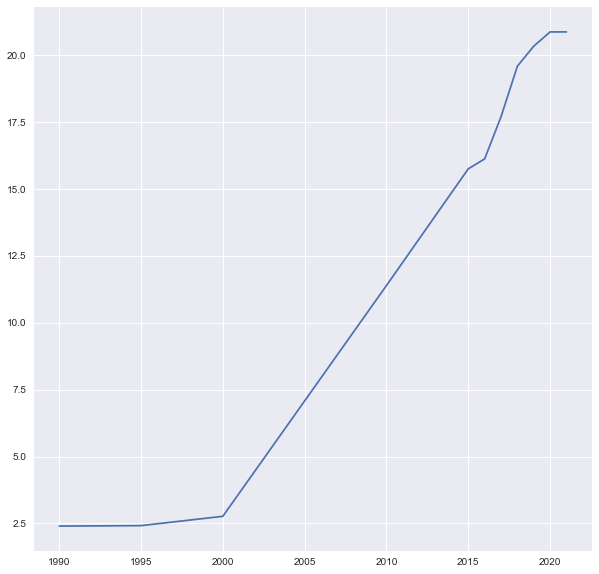

In [163]:
def getAverageByYear(variableName):
    return concat_df.loc[concat_df["Variable"]==variableName].groupby(['Year'])['Value'].mean().to_frame('Average')

gdp = getAverageByYear('Gross domestic product, volume, growth')
pop = getAverageByYear('Historical population')
green_pop = getAverageByYear('POPDEN')
green_terr = getAverageByYear('TERRESTRIAL')
green_marine = getAverageByYear('PA_MARINE')
fig, ax = plt.subplots(figsize=(10,10))

x = green_marine.index
y = green_marine["Average"]


ax.plot(x,y)

plt.show()

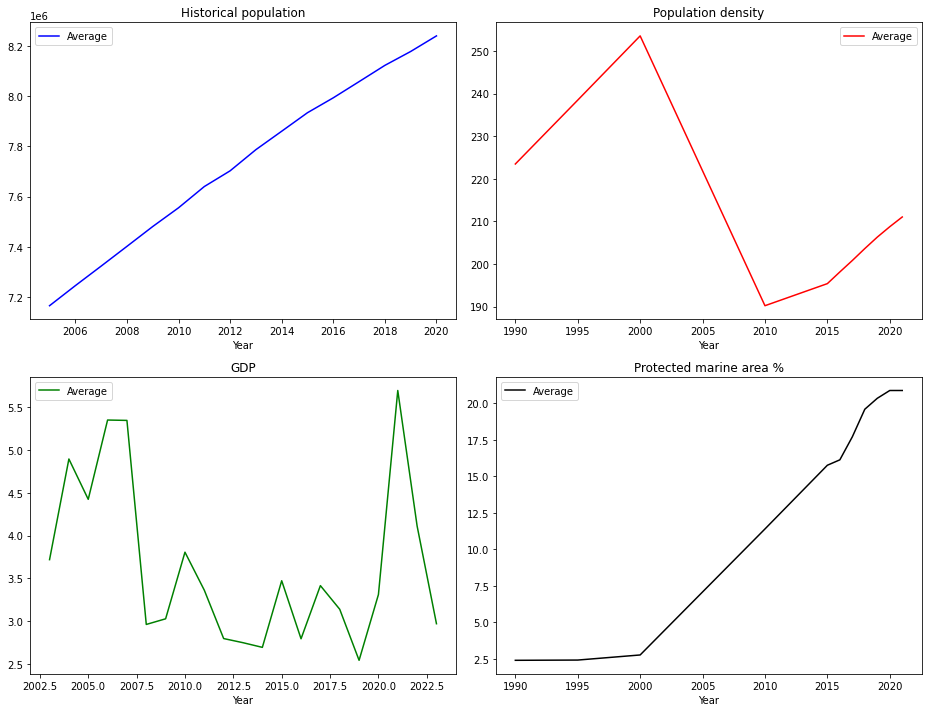

In [87]:
def getAverageByYear(variableName):
    return concat_df.loc[concat_df["Variable"]==variableName].groupby(['Year'])['Value'].mean().to_frame('Average')

gdp = getAverageByYear('Gross domestic product, volume, growth')
pop = getAverageByYear('Historical population')
green_pop = getAverageByYear('POPDEN')
green_terr = getAverageByYear('TERRESTRIAL')
green_marine = getAverageByYear('PA_MARINE')


fig2, ax2 = plt.subplots(2,2, figsize=(13,10))

pop.plot(ax=ax2[0, 0],color='blue')
green_pop.plot(ax=ax2[0,1],color='red')
gdp.plot(ax=ax2[1, 0],color='green')
green_marine.plot(ax=ax2[1, 1],color='black')

ax2[0,0].set_title('Historical population')
ax2[0,1].set_title('Population density')
ax2[1,0].set_title('GDP')
ax2[1,1].set_title('Protected marine area %')

plt.tight_layout()

In [88]:
concat_1= concat_df.loc[["Ireland","France","United Kingdom"]].sort_index()

print(concat_1.head())

                      Variable  Year      Value
Country                                        
France   Historical population  2018  3931037.0
France   Historical population  2012  2251172.0
France   Historical population  2013  2269485.0
France   Historical population  2014  2270731.0
France   Historical population  2015  2234322.0


In [190]:
concat_year= concat_1[(concat_1['Year'] >= 2010) & (concat_1['Year'] <= 2020)]
print(concat_year)

                             Variable  Year         Value
Country                                                  
France          Historical population  2018  3.931037e+06
France          Historical population  2012  2.251172e+06
France          Historical population  2013  2.269485e+06
France          Historical population  2014  2.270731e+06
France          Historical population  2015  2.234322e+06
...                               ...   ...           ...
United Kingdom  Historical population  2013  2.221444e+06
United Kingdom  Historical population  2012  2.253661e+06
United Kingdom  Historical population  2011  2.281406e+06
United Kingdom  Historical population  2017  4.574931e+06
United Kingdom  Historical population  2020  4.258093e-01

[3162 rows x 3 columns]


In [189]:
concat_Ireland= concat_year.loc[["Ireland"]].sort_index()

print(concat_Ireland.head())

                      Variable  Year          Value
Country                                            
Ireland  Historical population  2019       1.327585
Ireland  Historical population  2012  167990.000000
Ireland  Historical population  2013  170897.000000
Ireland  Historical population  2014  172949.000000
Ireland  Historical population  2015  175017.000000


In [185]:
concat_year.Variable.unique()

array(['Historical population', 'PA_TERRESTRIAL', 'PA_MARINE', 'POPDEN',
       'Gross domestic product, volume, growth'], dtype=object)

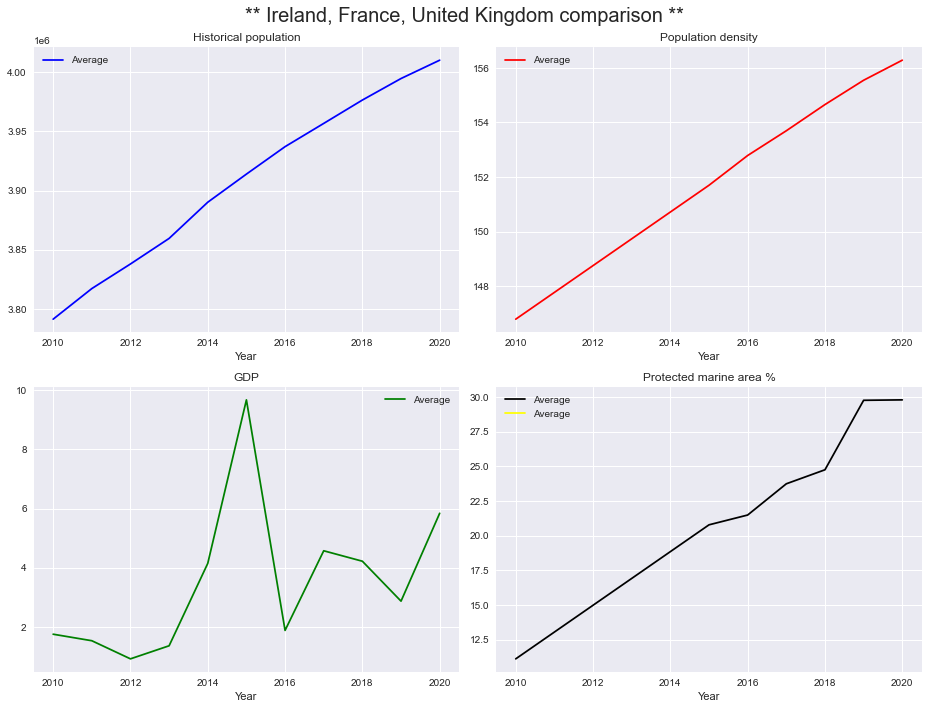

In [184]:
def getAverageByYear(variableName):
    return concat_year.loc[concat_year["Variable"]==variableName].groupby(['Year'])['Value'].mean().to_frame('Average')

gdp = getAverageByYear('Gross domestic product, volume, growth')
pop = getAverageByYear('Historical population')
green_pop = getAverageByYear('POPDEN')
green_terr = getAverageByYear('TERRESTRIAL')
green_marine = getAverageByYear('PA_MARINE')


fig2, ax2 = plt.subplots(2,2, figsize=(13,10))
fig2.suptitle('** Ireland, France, United Kingdom comparison **', fontsize=20)
plt.style.use('seaborn')

pop.plot(ax=ax2[0, 0],color='blue')
green_pop.plot(ax=ax2[0,1],color='red')
gdp.plot(ax=ax2[1, 0], color='green')
green_marine.plot(ax=ax2[1, 1],color='black')
green_terr.plot(ax=ax2[1, 1],color='yellow')

ax2[0,0].set_title('Historical population')
ax2[0,1].set_title('Population density')
ax2[1,0].set_title('GDP')
ax2[1,1].set_title('Protected marine area %')


plt.tight_layout()